# INTRODUCTION

## Cherenkov Detectors Are Crucial for Neutrino Astrophysics, WHY?

In [10]:
from IPython.display import Image
from IPython.display import HTML

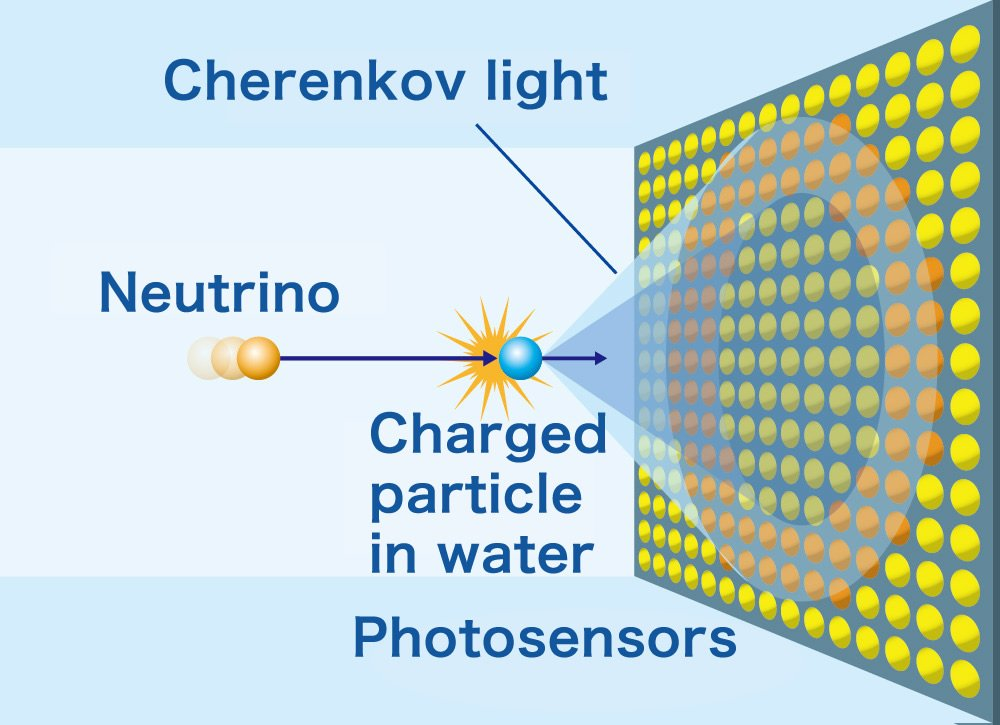

In [11]:
Image("tutorial_images/ch_principle.jpg", width=400)

Cherenkov light is emitted when a particle travels faster than the speed of light in the medium.
Cherenkov light forms a well understood geometrical pattern, consisting of a collection of light cones with vertices on the track trajectory.

Most Neutrino Telescopes are made of water. When the particle is ultra-relativistic, the Cherenkov angle (cone opening angle is ~42 degrees.
Water Cherenkov detectors allow to study neutrinos with great precision on an event-by-event basis.

Two main detector concepts exist: One using photosensors on the surfaces of a large strucutre sourrounding a big volume of water (Kamioknade, Super-Kamiokande, Hyper-Kamiokande...), the other using an  array of string (IceCube, KM3NET...), with the former focussed on low and intermediate energies [MeV-GeV] and the latter dedicated to intermediate and high energies[GeV-TeV]

In this tutorials we will focus on AI/ML tools in the context of images similar to those in Super-Kamiokande.

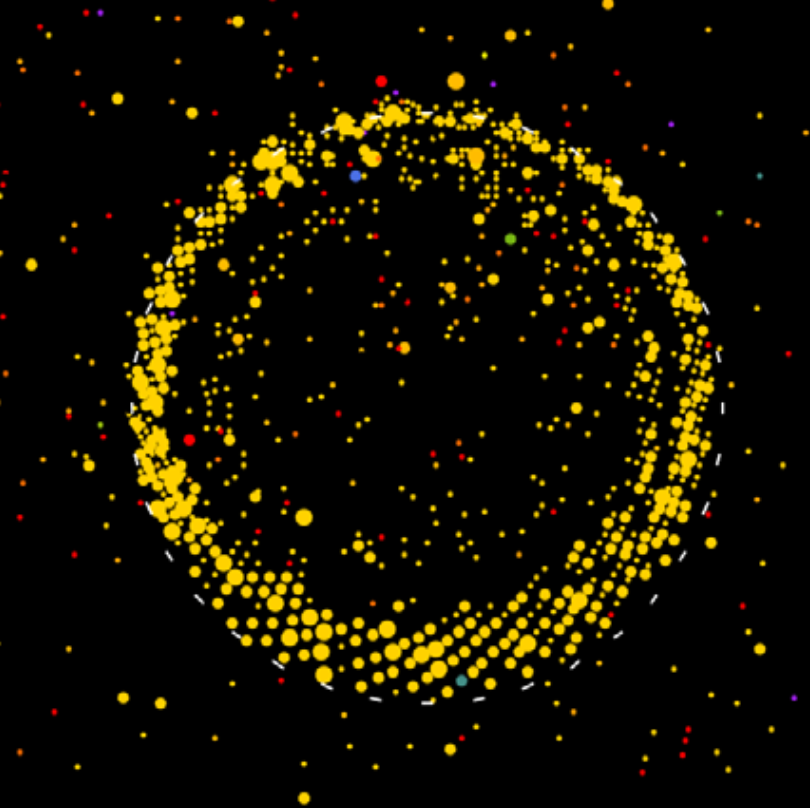

In [9]:
Image("tutorial_images/SK-numu-display.png", width=400)

This is an example on how a $\nu_\mu$ interactions looks in Super-Kamiokande.

This type of Neutrino Telescopes have been crucial in forming our current understanding of Astrophysics.
A collection of references you might read to deepen in this topic:

* First Detection of Supernova Neutrinos ('<a href="https://journals.aps.org/prd/pdf/10.1103/PhysRevD.38.448">Phys.Rev.D 38 (1988) 448-458</a>')
* Studying the Sun with Neutrinos ('<a href="https://arxiv.org/abs/2312.12907">Phys.Rev.D 109 (2024) 9, 092001</a>')
* Studying Neurino Oscillations with Atmospheric Neutrinos ('<a href="https://arxiv.org/abs/2311.05105">Phys.Rev.D 109 (2024) 7, 072014</a>')
* Measuring Matter-Antimatter Asymmetry in Neutrino Oscillations ('<a href="https://arxiv.org/abs/1910.03887">Nature 580 (2020) 7803, 339-344</a>')

## Getting Started

To understand how AI/ML can assist to task related to the science being researched with this type of detectors, we can create simple datasets that resemble their data without having to deal with the nuisances that would require dealing with the actual data from this detectors (as for instance, joining the collaboration!).

## For the exercises we will need two different datasets

### A dataset with either one or two rings in the same image (and an associated label file!).

In [21]:
import numpy as np
from PIL import Image, ImageDraw
import random
import os

def create_ring(image_size, center, radius, thickness, deformation=0):
    img = Image.new('L', (image_size, image_size), color=0)
    draw = ImageDraw.Draw(img)
    
    for angle in range(360):
        r = radius + random.uniform(-deformation, deformation)
        x = center[0] + r * np.cos(np.radians(angle))
        y = center[1] + r * np.sin(np.radians(angle))
        draw.ellipse([x-thickness/2, y-thickness/2, x+thickness/2, y+thickness/2], fill=255)
    
    return np.array(img)

def generate_N_ring_dataset(num_images, image_size=28, save_dir='N_ring_dataset'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    labels = []
    
    for i in range(num_images):
        # Note that you can have more rings in the same image if you like by changing the numbes below!
        num_rings = random.choice([1, 2])
        img = np.zeros((image_size, image_size), dtype=np.uint8)
        
        for _ in range(num_rings):
            center = (random.randint(5, image_size-5), random.randint(5, image_size-5))
            radius = random.randint(3, min(center[0], center[1], image_size-center[0], image_size-center[1])-2)
            thickness = random.uniform(0.2, 1)
            deformation = random.uniform(0, 1)
            
            ring = create_ring(image_size, center, radius, thickness, deformation)
            img = np.maximum(img, ring)
        
        img_pil = Image.fromarray(img)
        img_pil.save(f'{save_dir}/ring_image_{i}.png')
        labels.append(num_rings)
    
    with open(f'{save_dir}/labels.txt', 'w') as f:
        for label in labels:
            f.write(f'{label}\n')

In [32]:
# Generate 10000 images
generate_N_ring_dataset(10000)
print("Dataset generated successfully!")

Dataset generated successfully!


### A dataset with one ring and a set of associated properties (center, radius, thickness, and distortion)

In [31]:
import numpy as np
from PIL import Image, ImageDraw
import random
import os
import json

img_size = 28

def create_ring(image_size, center, radius, thickness, deformation=0):
    img = Image.new('L', (image_size, image_size), color=0)
    draw = ImageDraw.Draw(img)
    
    for angle in range(360):
        r = radius + random.uniform(-deformation, deformation)
        x = center[0] + r * np.cos(np.radians(angle))
        y = center[1] + r * np.sin(np.radians(angle))
        draw.ellipse([x-thickness/2, y-thickness/2, x+thickness/2, y+thickness/2], fill=255)
    
    return np.array(img)

def generate_dataset(num_images, image_size=img_size, save_dir='single_ring_dataset'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    labels = []
    
    for i in range(num_images):
        center = (random.randint(5, image_size-5), random.randint(5, image_size-5))
        radius = random.randint(4, min(center[0], center[1], image_size-center[0], image_size-center[1])-1)
        thickness = random.uniform(0.2, 1.5)#*np.sqrt(radius)
        deformation = random.uniform(0.5, 3)
        
        img = create_ring(image_size, center, radius, thickness, deformation)
        
        img_pil = Image.fromarray(img)
        img_pil.save(f'{save_dir}/ring_image_{i}.png')
        
        # Store the ring properties as a label, now including radius
        label = {
            "center": center,
            "radius": radius,
            "thickness": thickness,
            "deformation": deformation
        }
        labels.append(label)
    
    # Save labels as JSON
    with open(f'{save_dir}/labels.json', 'w') as f:
        json.dump(labels, f, indent=2)

# Example usage
generate_dataset(10000)

In [33]:
# importing image object from PIL 
import math 
from PIL import Image, ImageDraw 
  
w, h = 400, 190
shape = [(30, 40), (w - 20, h - 10)] 
  
# creating new Image object 
img = Image.new("RGB", (w, h)) 
  
# create ellipse image 
img1 = ImageDraw.Draw(img)   
img1.ellipse(shape, outline ="red") 
img.show()